<a href="https://colab.research.google.com/github/kyrahirasuna/IS4487/blob/main/Assgnmnt_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 4 Script

## Objectives

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/adviseinvest (5).csv')
df_test_newdata = pd.read_csv (r'/content/customer_data.csv')

Mounted at /content/gdrive


In [4]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [5]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [6]:
#describe the data before cleaning it
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Clean up the data

In [7]:
#Drop rows with N/A values
df_clean = df.dropna(axis = 0, how = 'any')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29502 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29502 non-null  int64  
 1   income          29502 non-null  int64  
 2   female          29502 non-null  int64  
 3   age             29502 non-null  int64  
 4   job             29502 non-null  int64  
 5   num_dependents  29502 non-null  int64  
 6   rent            29502 non-null  int64  
 7   own_res         29502 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29502 non-null  int64  
 10  sav_acct        29502 non-null  int64  
 11  num_accts       29502 non-null  int64  
 12  mobile          29502 non-null  int64  
 13  product         29502 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.4 MB


In [8]:
#Drop num_accts outlier
df_clean.drop(df_clean[df_clean['num_accts'] > 4].index, inplace = True)
df_clean.describe()

<ipython-input-8-554472d38167>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(df_clean[df_clean['num_accts'] > 4].index, inplace = True)


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000
mean,0.546592,33767.463137,0.054202,34.768415,1.915427,1.141012,0.210434,0.681096,0.240805,1.468391,0.956340,2.344870,0.091082,1.535711
std,0.497833,29380.583265,0.226419,11.354279,0.658194,0.348040,0.407623,0.466060,0.427580,1.234693,1.483763,1.200357,0.287730,1.625930
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


In [9]:
#Drop rows with negative income 
df_clean.drop(df_clean[df_clean['income'] < 0].index, inplace = True)
df_clean.describe()

<ipython-input-9-298eaf5c426e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(df_clean[df_clean['income'] < 0].index, inplace = True)


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000
mean,0.546595,33772.499407,0.054171,34.768840,1.915421,1.141022,0.210448,0.681074,0.240788,1.468355,0.956270,2.344859,0.091088,1.535747
std,0.497833,29374.485379,0.226359,11.354486,0.658216,0.348050,0.407634,0.466068,0.427569,1.234700,1.483765,1.200390,0.287739,1.625958
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


In [10]:
# Remove 'product' variable
df_clean.drop('product', inplace=True, axis=1)

df_clean.describe()

<ipython-input-10-94039cd8b726>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('product', inplace=True, axis=1)


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile
count,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000
mean,0.546595,33772.499407,0.054171,34.768840,1.915421,1.141022,0.210448,0.681074,0.240788,1.468355,0.956270,2.344859,0.091088
std,0.497833,29374.485379,0.226359,11.354486,0.658216,0.348050,0.407634,0.466068,0.427569,1.234700,1.483765,1.200390,0.287739
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000


In [11]:
# Ensure all categorical data is converted into factors 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29499 entries, 0 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29499 non-null  int64  
 1   income          29499 non-null  int64  
 2   female          29499 non-null  int64  
 3   age             29499 non-null  int64  
 4   job             29499 non-null  int64  
 5   num_dependents  29499 non-null  int64  
 6   rent            29499 non-null  int64  
 7   own_res         29499 non-null  int64  
 8   new_car         29499 non-null  float64
 9   chk_acct        29499 non-null  int64  
 10  sav_acct        29499 non-null  int64  
 11  num_accts       29499 non-null  int64  
 12  mobile          29499 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.2 MB


## Question 2


In [12]:
#Find the mean value
df_clean['answered'].mean()


0.5465947998237228

## Question 3

In [13]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income']]
y = df_clean['answered']

money_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
money_tree = money_tree.fit(x,y)

In [14]:
#Preview the Tree
money_tree_text = tree.export_text(money_tree)
print(money_tree_text)

|--- feature_0 <= 39135.00
|   |--- feature_0 <= 35625.00
|   |   |--- feature_0 <= 4295.00
|   |   |   |--- class: 1
|   |   |--- feature_0 >  4295.00
|   |   |   |--- feature_0 <= 9595.00
|   |   |   |   |--- feature_0 <= 7890.00
|   |   |   |   |   |--- feature_0 <= 4455.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  4455.00
|   |   |   |   |   |   |--- feature_0 <= 5900.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  5900.00
|   |   |   |   |   |   |   |--- feature_0 <= 6990.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 6135.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  6135.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 6255.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  6255.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 6555.00
|   |   |   |   |   |   |   |   

In [15]:
pred = money_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.9934913047899929


In [16]:
# Edit max_depth for lab 
money_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Create Decision Tree Classifer
money_tree2 = money_tree2.fit(x,y)

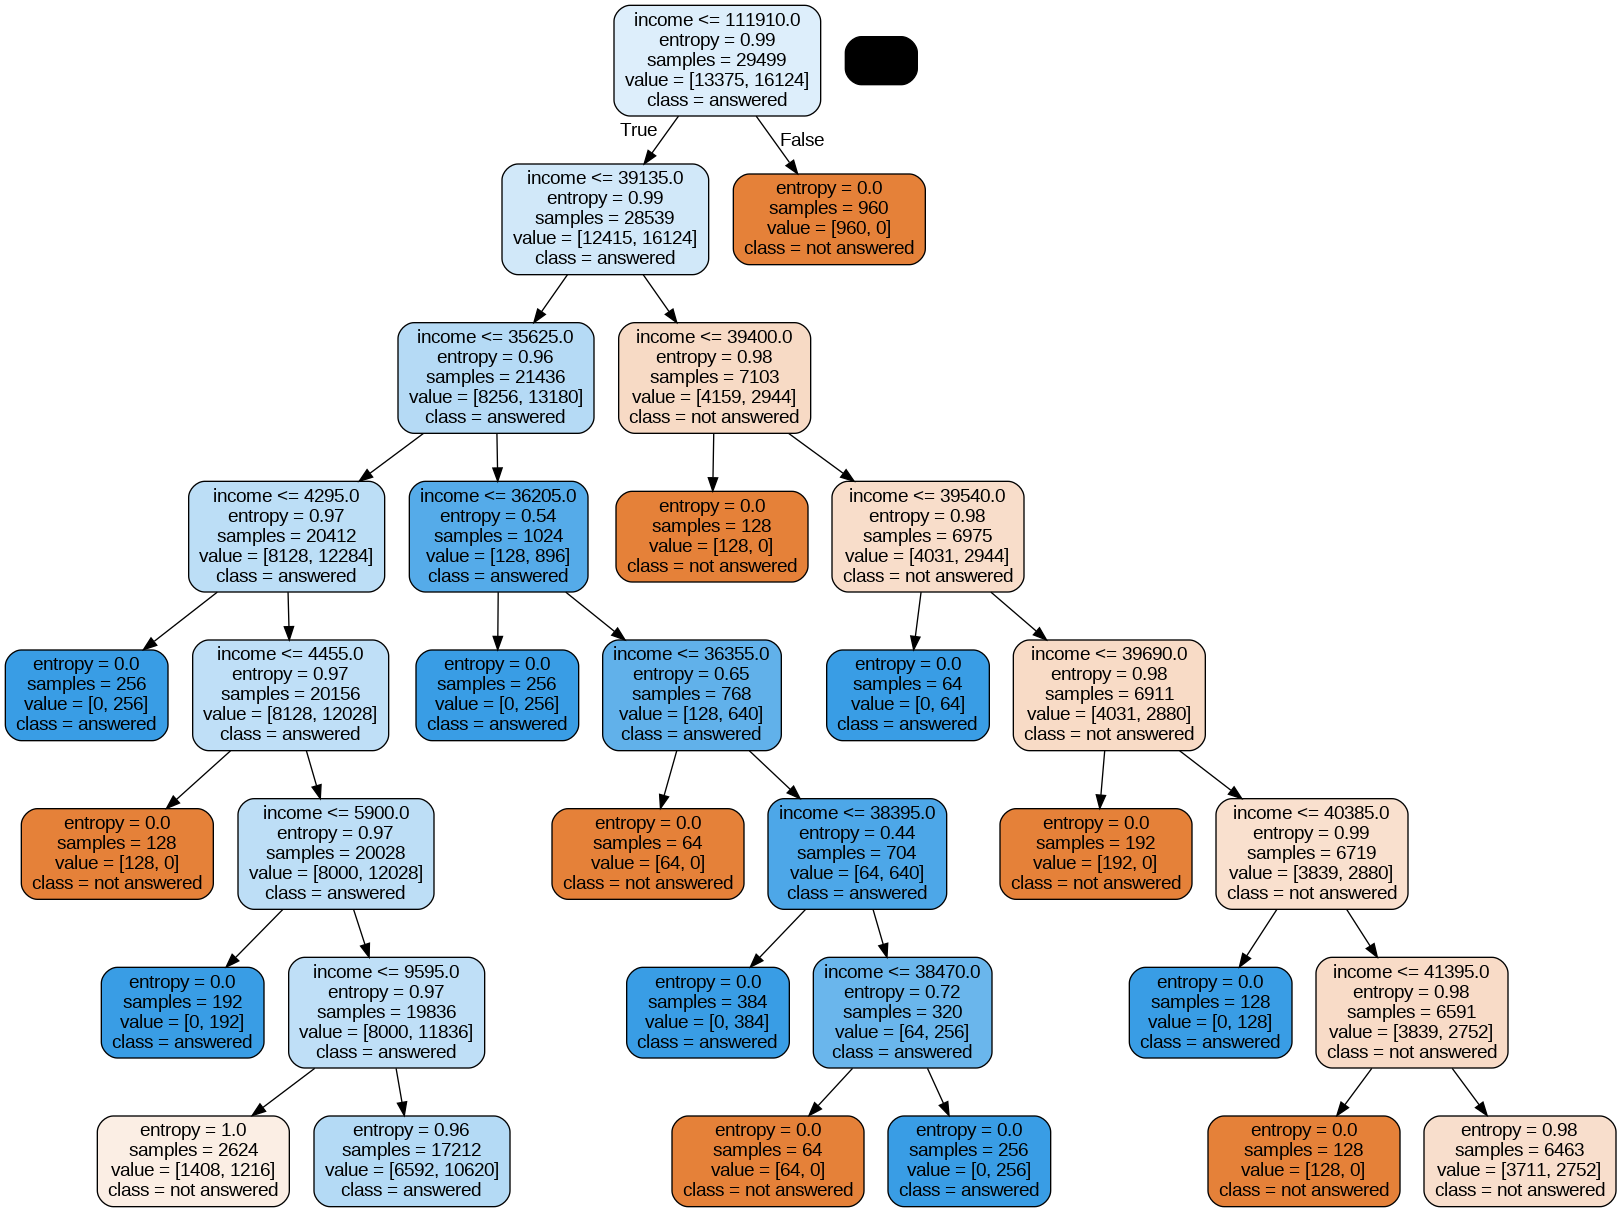

In [17]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(money_tree2, out_file=dot_data, 
                   feature_names=x.columns,class_names=['not answered','answered'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [18]:
pred = money_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.6420217634496085


## Part 2: Using All Predictors

In [19]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','female','age','job','num_dependents','rent','own_res','new_car','chk_acct','sav_acct','num_accts','mobile']]
y = df_clean['answered']

money_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
money_tree = money_tree.fit(x,y)

In [20]:
#Preview the Tree
money_tree_text = tree.export_text(money_tree)
print(money_tree_text)

|--- feature_8 <= 2.50
|   |--- feature_0 <= 79840.00
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_9 <= 1.50
|   |   |   |   |--- feature_0 <= 5900.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5900.00
|   |   |   |   |   |--- feature_2 <= 25.50
|   |   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |   |--- feature_0 <= 15565.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  15565.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 16185.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  16185.00
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 24.50
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |

In [21]:
pred = money_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 1.0


In [22]:

# Edit max_depth for lab 
money_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
money_tree2 = money_tree2.fit(x,y)

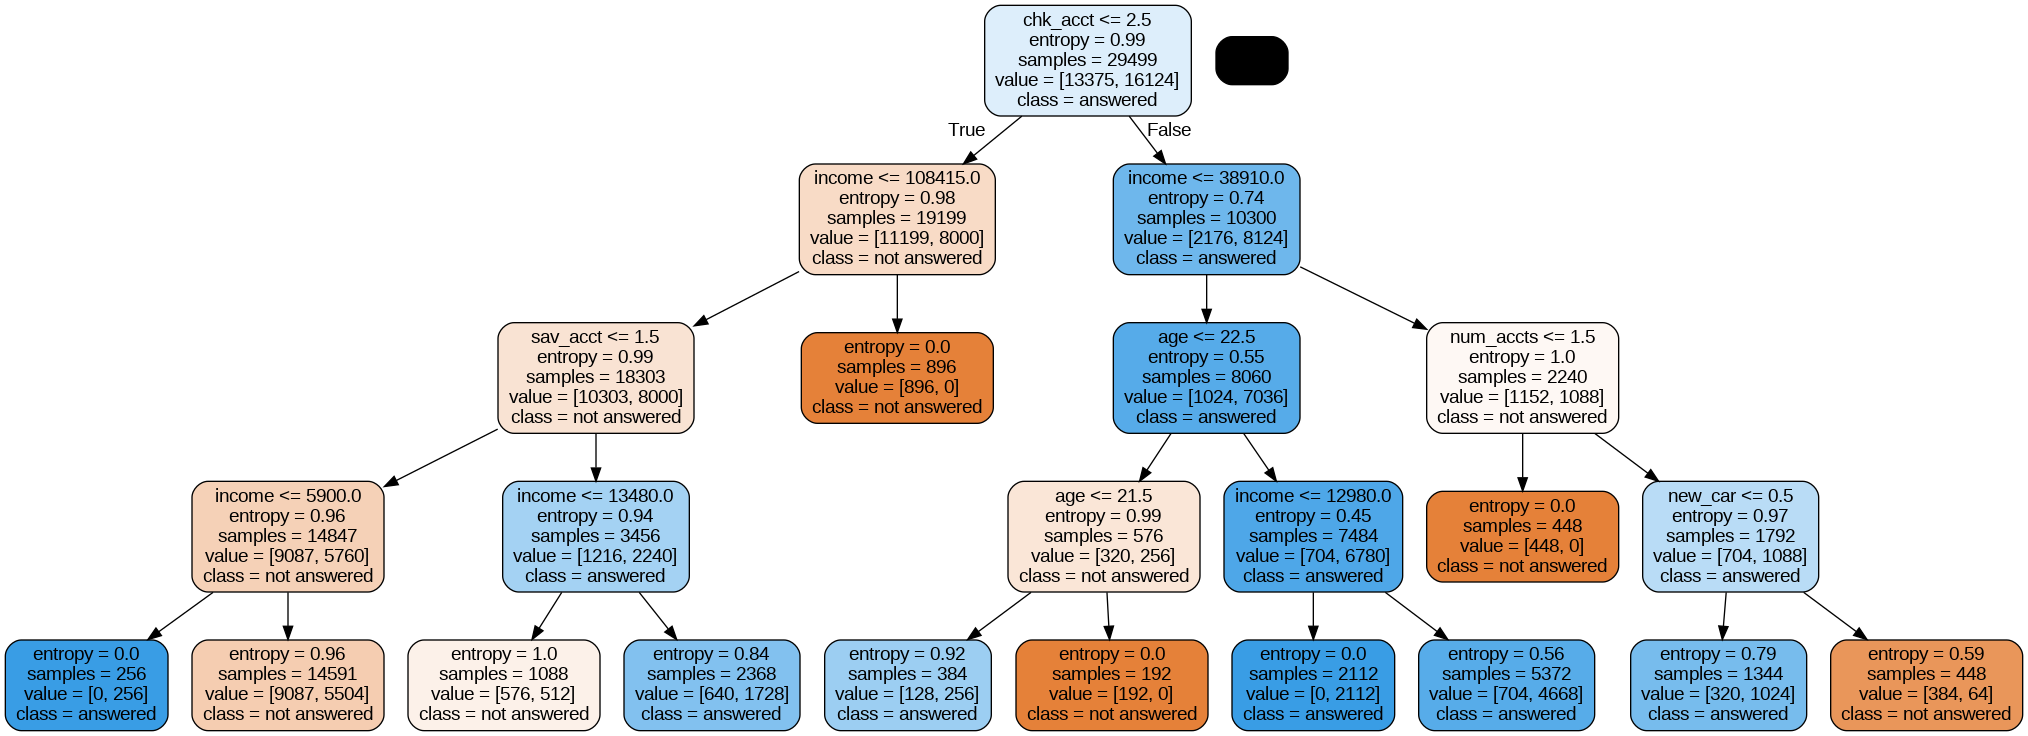

In [23]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(money_tree2, out_file=dot_data, 
                   feature_names=x.columns,class_names=['not answered','answered'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [24]:

pred = money_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.7331434963897081


The accuracy of this tree is greater than the income model's. 

## Confusion Matrix

In [25]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','female','age','job','num_dependents','rent','own_res','new_car','chk_acct','sav_acct','num_accts','mobile']]
y = df_clean['answered']

#place 20% of data in a test dataframe
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Fit a basic tree model

In [26]:
adviseinvest_tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Create Decision Tree Classifer
adviseinvest_tree = adviseinvest_tree.fit(x_train,y_train)

# Use the tree to predict "leave" - test
y_predict = (adviseinvest_tree.predict_proba(x)[:,1] >= 0.5)
y_predict

array([ True, False,  True, ...,  True,  True, False])

#Create a confusion matrix

In [27]:
# create a confusion matrix
adviseinvest_tree_matrix = confusion_matrix(y, y_predict)
print(adviseinvest_tree_matrix)

[[12671   704]
 [ 4864 11260]]


[Text(0, 0.5, 'Answered'), Text(0, 1.5, 'Not Answered')]

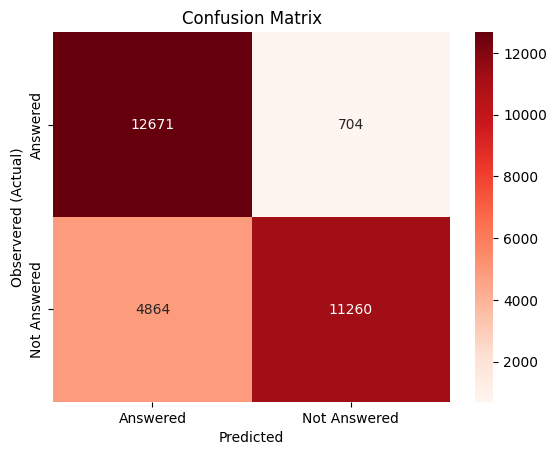

In [28]:
#Create a heatmap from our confusion matrix
cm = sns.heatmap(adviseinvest_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Answered','Not Answered'])
cm.yaxis.set_ticklabels(['Answered','Not Answered'])